Data Preparation

In [2]:
import pandas as pd

credit_df = pd.read_csv("../data/processed/credit_processed.csv")


In [3]:
X_credit = credit_df.drop(columns=['Class'])
y_credit = credit_df['Class']

In [4]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_credit,
    y_credit,
    test_size=0.2,
    stratify=y_credit,
    random_state=42
)


In [5]:
print("Original distribution:\n", y_credit.value_counts(normalize=True))
print("\nTrain distribution:\n", yc_train.value_counts(normalize=True))
print("\nTest distribution:\n", yc_test.value_counts(normalize=True))

Original distribution:
 Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64

Train distribution:
 Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64

Test distribution:
 Class
0    0.998326
1    0.001674
Name: proportion, dtype: float64


In [6]:
fraud_df = pd.read_csv("../data/processed/fraud_processed.csv")

In [7]:
X_fraud = fraud_df.drop(columns=['class'])
y_fraud = fraud_df['class']

In [8]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    X_fraud,
    y_fraud,
    test_size=0.2,
    stratify=y_fraud,
    random_state=42
)


In [9]:
print("Original distribution:\n", y_fraud.value_counts(normalize=True))
print("\nTrain distribution:\n", yf_train.value_counts(normalize=True))
print("\nTest distribution:\n", yf_test.value_counts(normalize=True))


Original distribution:
 class
0    0.906354
1    0.093646
Name: proportion, dtype: float64

Train distribution:
 class
0    0.906352
1    0.093648
Name: proportion, dtype: float64

Test distribution:
 class
0    0.906363
1    0.093637
Name: proportion, dtype: float64


In [10]:
credit_df.shape, credit_df['Class'].value_counts()

((283726, 32),
 Class
 0    283253
 1       473
 Name: count, dtype: int64)

In [11]:
fraud_df.shape, fraud_df['class'].value_counts()

((151112, 202),
 class
 0    136961
 1     14151
 Name: count, dtype: int64)

In [13]:
from sklearn.linear_model import LogisticRegression

# Credit card model
lr_credit = LogisticRegression(
    max_iter=5000,
    class_weight="balanced",
    solver="lbfgs",
    random_state=42
)

lr_credit.fit(Xc_train, yc_train)


# Fraud model
lr_fraud = LogisticRegression(
    max_iter=5000,
    class_weight="balanced",
    solver="lbfgs",
    random_state=42
)

lr_fraud.fit(Xf_train, yf_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [14]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    average_precision_score
)

def evaluate_model(model, X_test, y_test, name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Evaluation")
    print("-" * 40)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("AUC-PR:", average_precision_score(y_test, y_prob))


In [15]:
evaluate_model(lr_credit, Xc_test, yc_test, "Logistic Regression – Credit Card")


Logistic Regression – Credit Card Evaluation
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.97      0.99     56746

Confusion Matrix:
 [[55240  1411]
 [   12    83]]
AUC-PR: 0.6722844483897296


In [16]:
evaluate_model(lr_fraud, Xf_test, yf_test, "Logistic Regression – Fraud Data")


Logistic Regression – Fraud Data Evaluation
----------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.73      0.83     27393
           1       0.20      0.66      0.31      2830

    accuracy                           0.72     30223
   macro avg       0.58      0.69      0.57     30223
weighted avg       0.88      0.72      0.78     30223

Confusion Matrix:
 [[20022  7371]
 [  967  1863]]
AUC-PR: 0.2761367526715672


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE


# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(Xc_train)
X_test_scaled = scaler.transform(Xc_test)

# Apply SMOTE to oversample minority class
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, yc_train)

# Train Logistic Regression with class_weight balanced
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)

# Predict
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(yc_test, y_pred))
print("\nClassification Report:")
print(classification_report(yc_test, y_pred))

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(yc_test, y_prob)
pr_auc = auc(recall, precision)
print(f"AUC-PR: {pr_auc:.3f}")


Confusion Matrix:
[[55164  1487]
 [   12    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746

AUC-PR: 0.718


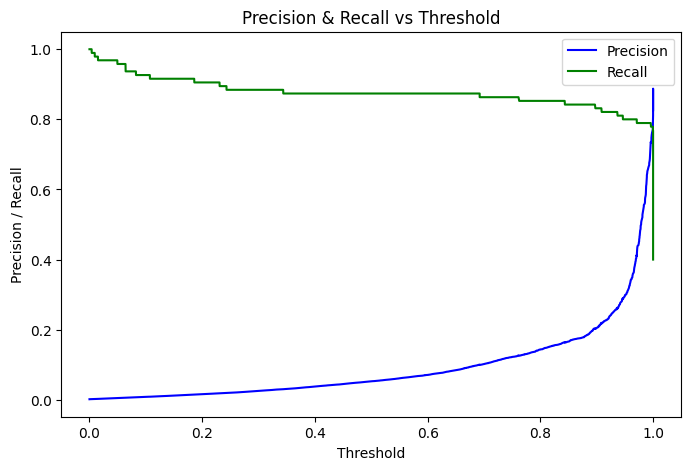

Confusion Matrix:
[[55565  1086]
 [   12    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.87      0.13        95

    accuracy                           0.98     56746
   macro avg       0.54      0.93      0.56     56746
weighted avg       1.00      0.98      0.99     56746


AUC-PR: 0.684


In [19]:
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, average_precision_score
import matplotlib.pyplot as plt


# 1. Compute precision, recall at different thresholds
precision, recall, thresholds = precision_recall_curve(yc_test, y_prob)

# 2. Plot Precision-Recall vs Threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Precision / Recall')
plt.title('Precision & Recall vs Threshold')
plt.legend()
plt.show()

# 3. Choose a threshold that balances precision and recall
chosen_threshold = 0.6  # Adjust based on plot

# 4. Make predictions using the new threshold
y_pred_thresh = (y_prob >= chosen_threshold).astype(int)

# 5. Evaluate the new predictions
print("Confusion Matrix:")
print(confusion_matrix(yc_test, y_pred_thresh))

print("\nClassification Report:")
print(classification_report(yc_test, y_pred_thresh))

# 6. Compute AUC-PR
auc_pr = average_precision_score(yc_test, y_prob)
print(f"\nAUC-PR: {auc_pr:.3f}")


In [21]:
import numpy as np

# y_train = training labels
neg, pos = np.bincount(yc_train)
scale_pos_weight = neg / pos

scale_pos_weight


np.float64(599.4761904761905)

In [32]:
from xgboost import XGBClassifier

xgb_tuned = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=2,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    scale_pos_weight=500,
    eval_metric="aucpr",
    random_state=42,
    n_jobs=-1
)

xgb_tuned.fit(Xc_train, yc_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [33]:
y_probs = xgb_tuned.predict_proba(Xc_test)[:, 1]

# try lower threshold
y_pred = (y_probs >= 0.30).astype(int)


In [35]:
for t in [0.5, 0.4, 0.3, 0.25]:
    preds = (y_probs >= t).astype(int)


In [36]:
print("Confusion Matrix:")
print(confusion_matrix(yc_test, y_pred))

print("\nClassification Report:")
print(classification_report(yc_test, y_pred))

Confusion Matrix:
[[56574    77]
 [   16    79]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.51      0.83      0.63        95

    accuracy                           1.00     56746
   macro avg       0.75      0.92      0.81     56746
weighted avg       1.00      1.00      1.00     56746



In [40]:
from sklearn.metrics import average_precision_score

auc_pr = average_precision_score(yc_test, y_probs)
print("AUC-PR:", auc_pr)


AUC-PR: 0.8191125341886997


In [26]:
import numpy as np

# y_train = training labels
neg, pos = np.bincount(yf_train)
scale_pos_weight = neg / pos

scale_pos_weight


np.float64(9.678296970232312)

In [47]:
from xgboost import XGBClassifier

xgb_cc = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="aucpr",
    random_state=42
)

xgb_cc.fit(Xf_train, yf_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = xgb_cc.predict(Xf_test)
y_proba = xgb_cc.predict_proba(Xf_test)[:, 1]

In [49]:
print("Confusion Matrix:")
print(confusion_matrix(yf_test, y_pred))

print("\nClassification Report:")
print(classification_report(yf_test, y_pred))

Confusion Matrix:
[[27304    89]
 [ 1296  1534]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.95      0.54      0.69      2830

    accuracy                           0.95     30223
   macro avg       0.95      0.77      0.83     30223
weighted avg       0.95      0.95      0.95     30223



In [50]:
from sklearn.metrics import average_precision_score

auc_pr = average_precision_score(yf_test, y_proba)
print("AUC-PR:", auc_pr)

AUC-PR: 0.6327638875191357


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score
from xgboost import XGBClassifier

# Load dataset
data = pd.read_csv('../data/processed/credit_processed.csv')

# Features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameters tuned for imbalanced dataset
xgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': (y==0).sum() / (y==1).sum(),  # handle class imbalance
    'eval_metric': 'aucpr',
    'random_state': 42,
    'early_stopping_rounds': 20  
}

aucpr_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    model = XGBClassifier(**xgb_params)
    model.fit(
        X_train_res,
        y_train_res,
        eval_set=[(X_test, y_test)],
        verbose=False
    )

    # Predict probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Threshold tuning: lower threshold to increase recall
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    f1_scores = 2 * precision * recall / (precision + recall + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]
    y_pred = (y_probs >= best_threshold).astype(int)

    # Confusion Matrix and Classification Report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    aucpr = average_precision_score(y_test, y_probs)

    print(f"Fold {fold} Confusion Matrix:\n{cm}")
    print(f"Fold {fold} Classification Report:\n{cr}")
    print(f"Fold {fold} AUC-PR: {aucpr:.4f}\n")

    aucpr_scores.append(aucpr)

print(f"Average AUC-PR across folds: {np.mean(aucpr_scores):.4f}")


Fold 1 Confusion Matrix:
[[56641    10]
 [   16    79]]
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.89      0.83      0.86        95

    accuracy                           1.00     56746
   macro avg       0.94      0.92      0.93     56746
weighted avg       1.00      1.00      1.00     56746

Fold 1 AUC-PR: 0.7811

Fold 2 Confusion Matrix:
[[56636    15]
 [   20    74]]
Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.83      0.79      0.81        94

    accuracy                           1.00     56745
   macro avg       0.92      0.89      0.90     56745
weighted avg       1.00      1.00      1.00     56745

Fold 2 AUC-PR: 0.7487

Fold 3 Confusion Matrix:
[[56641    10]
 [   21    73]]
Fold 3 Classification Report:
              precision    recall  f1-scor

In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Load data
data = pd.read_csv('../data/processed/fraud_processed.csv')
X = data.drop('class', axis=1)
y = data['class']

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'aucpr',
    'random_state': 42,
    'early_stopping_rounds': 20
}

# Lists to store metrics
aucpr_scores = []
recall_scores = []
precision_scores = []
best_thresholds = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Train XGBoost
    model = XGBClassifier(**xgb_params)
    model.fit(X_train_res, y_train_res, eval_set=[(X_test, y_test)], verbose=False)

    # Predicted probabilities for fraud class
    y_probs = model.predict_proba(X_test)[:, 1]

    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

    # Select threshold: precision >= 0.90 & maximize recall
    valid_idx = np.where(precision >= 0.90)[0]
    if len(valid_idx) > 0:
        best_idx = valid_idx[np.argmax(recall[valid_idx])]
        best_threshold = thresholds[best_idx] if best_idx < len(thresholds) else 0.5
    else:
        best_threshold = 0.5  # fallback

    # Apply threshold
    y_pred = (y_probs >= best_threshold).astype(int)

    # Metrics
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, zero_division=0)
    aucpr = average_precision_score(y_test, y_probs)

    print(f"Fold {fold} Confusion Matrix:\n{cm}")
    print(f"Fold {fold} Classification Report:\n{cr}")
    print(f"Fold {fold} AUC-PR: {aucpr:.4f}")
    print(f"Fold {fold} Best Threshold (precision>=0.90 & max recall): {best_threshold:.4f}\n")

    # Save metrics
    aucpr_scores.append(aucpr)
    recall_scores.append(recall[best_idx])
    precision_scores.append(precision[best_idx])
    best_thresholds.append(best_threshold)

# Average metrics across folds
print(f"Average AUC-PR across folds: {np.mean(aucpr_scores):.4f}")
print(f"Average Recall for fraud class: {np.mean(recall_scores):.4f}")
print(f"Average Precision for fraud class: {np.mean(precision_scores):.4f}")
print(f"Average best threshold: {np.mean(best_thresholds):.4f}")


Fold 1 Confusion Matrix:
[[27223   170]
 [ 1294  1536]]
Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     27393
           1       0.90      0.54      0.68      2830

    accuracy                           0.95     30223
   macro avg       0.93      0.77      0.83     30223
weighted avg       0.95      0.95      0.95     30223

Fold 1 AUC-PR: 0.6247
Fold 1 Best Threshold (precision>=0.90 & max recall): 0.7348

Fold 2 Confusion Matrix:
[[27308    84]
 [ 1344  1487]]
Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27392
           1       0.95      0.53      0.68      2831

    accuracy                           0.95     30223
   macro avg       0.95      0.76      0.83     30223
weighted avg       0.95      0.95      0.95     30223

Fold 2 AUC-PR: 0.5977
Fold 2 Best Threshold (precision>=0.90 & max recall): 0.6495

Fold 3